In [1]:
# chapter 3

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 気温
temperature = np.array([18, 25, 20, 27, 32, 22, 29, 19, 26, 30, 22, 28, 30])
# 売上
earnings = np.array([22000, 64500, 27800, 81500, 112000, 46500, 98000, 26000, 69000, 99500, 55000, 78500, 87000])

In [4]:
temperature.size, earnings.size

(13, 13)

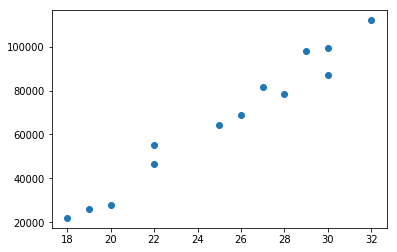

In [5]:
plt.scatter(temperature, earnings)
plt.show()

In [7]:
# 身長
height = np.array([147, 176, 156, 181, 162, 155, 167, 149, 166, 158, 177, 170, 159])
# 性別
gender = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [8]:
# Y = 6329.7 * X - 92988

In [9]:
height.size, gender.size

(13, 13)

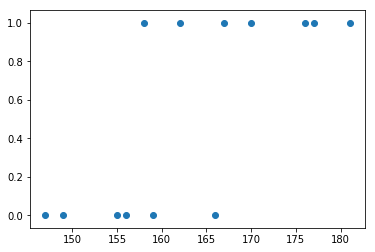

In [10]:
plt.scatter(height, gender)
plt.show()

In [11]:
# chapter 14　単回帰

In [12]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# 生徒のテスト勉強時間からテストの点数を予測
# x：テスト勉強時間、y：テスト点数

In [14]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [15]:
np.dot(a, b)

32

In [16]:
# cahapter 15 データの読み込みと確認

In [17]:
data = np.loadtxt("007-01.csv", delimiter=",", skiprows=1)

In [18]:
data.shape

(49, 2)

In [29]:
data[:10, :], data[-10:, :], data[-1]

(array([[  5.2,  78. ],
        [  4.2,  77. ],
        [  7.6,  95. ],
        [  2.7,  66. ],
        [  9.1,  91. ],
        [  1.3,  59. ],
        [  3.6,  72. ],
        [  9.4, 100. ],
        [  6.8,  88. ],
        [  8.5,  89. ]]), array([[ 6.6, 89. ],
        [ 4.5, 78. ],
        [ 3.8, 74. ],
        [ 3.8, 73. ],
        [ 4.7, 80. ],
        [ 1.5, 60. ],
        [ 5. , 81. ],
        [ 9.1, 91. ],
        [ 4.3, 74. ],
        [ 1.3, 58. ]]), array([ 1.3, 58. ]))

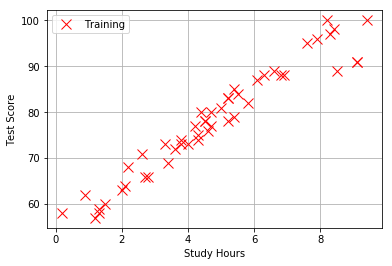

In [30]:
plt.plot(data[:, 0], data[:, 1], "rx", markersize=10, label="Training")
plt.xlabel("Study Hours")
plt.ylabel("Test Score")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# chapter 16 コスト関数の作成

In [32]:
# 線形モデルの数式：^y = w1 * x + w0
# コスト関数：J(w0, w1) = 1 / 2m * ∑m i=1(^yi − yi) ** 2
# コスト関数（^yを代入）：J(w0, w1)=1 / 2m * ∑m i=1((w1 * x + w0) − yi) ** 2
# len(data) = データの個数（m = 生徒49名）
# コードのどの部分が計算式のどの部分に該当しているのか把握
# w0, w1= 0, 0（w1とw0の初期値を0とする）

In [34]:
# コスト関数（二乗和誤差）
# 入力
#   w0：w0の重み
#   w1：ｗ1の重み
#   data：コストを計算するデータ　特徴量[0]：勉強時間　目的変数、正解値[1]：点数
# リターン値
#   cost：誤差
def cost(w0, w1, data):
    cost = 0
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        cost += ((w1 * x + w0) - y) ** 2 
    cost /= len(data) * 2
    return cost

In [35]:
w1, w0 = 0, 0
cost(w1, w0, data)

3128.3979591836733

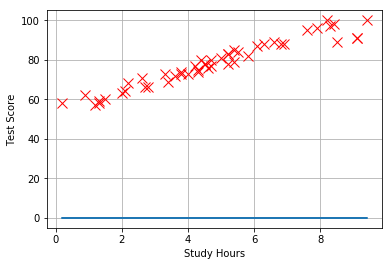

In [36]:
plt.plot(data[:, 0], data[:, 1], "rx", markersize=10, label="Training")
plt.xlabel("Study Hours")
plt.ylabel("Test Score")
plt.plot(data[:, 0], data[:, 0] * w1 + w0)
plt.grid(True)
plt.show()

In [37]:
# コスト関数２（二乗和誤差）
# 入力
#   w0：w0の重み
#   w1：ｗ1の重み
#   data：コストを計算するデータ　特徴量[0]：勉強時間　目的変数、正解値[1]：点数
# リターン値
#   cost：誤差
    x = data[:, 0]
    y = data[:, 1]
    # 二乗和誤差
    cost2 = ((w1 * x + w0) - y) ** 2
    return np.sum(cost2) / (2 * cost2.size)

In [38]:
cost2(w0, w1, data)

3128.3979591836733

In [39]:
# chapter 17 最急降下法の作成

In [40]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# w0_in、w1_inは最急降下法へ入力するパラメーター
# w0_out、w1_outは最急降下法が処理を行い更新したパラメーター

In [42]:
# 最急降下法
# 入力
#   w0：w0の重み（更新前）
#   w1：ｗ1の重み（更新前）
#   data：計算するデータ　特徴量[0]：勉強時間　目的変数、正解値[1]：点数
# リターン値
#   w0_out：w0の重み（更新後）
#   w1_out：ｗ1の重み（更新後）
def gradentDecent(w0_in, w1_in, data, alpha):
    w0_gradent = 0
    w1_gradent = 0
    m = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        w0_gradent += (1 / m) * (((w1_in * x) + w0_in) - y)
        w1_gradent += (1 / m) * ((((w1_in * x) + w0_in) - y) * x)
    w0_out = w0_in - (alpha * w0_gradent)
    w1_out = w1_in - (alpha * w1_gradent)
    return [w0_out, w1_out]

In [43]:
# 最急降下法
# 入力
#   w0：w0の重み（更新前）
#   w1：ｗ1の重み（更新前）
#   data：計算するデータ　特徴量[0]：勉強時間　目的変数、正解値[1]：点数
# リターン値
#   w0_out：w0の重み（更新後）
#   w1_out：ｗ1の重み（更新後）
def gradentDecent2(w0_in, w1_in, data, alpha):
    w0_gradent = 0
    w1_gradent = 0
    x = data[:, 0]
    y = data[:, 1]
    cost_y = ((w1_in * x) + w0_in) - y
    cost_x = (((w1_in * x) + w0_in) - y) * x
    w0_out = w0_in - (alpha * cost_y.mean())
    w1_out = w1_in - (alpha * cost_x.mean())
    return [w0_out, w1_out]

In [44]:
# chapter 18 線形回帰モデル構築

In [45]:
# alpha = 学習率(0.01)
# int_w0 = w0の初期値(0）
# int_w1 = w1の初期値(0）
# iterations = 学習回数(5000)

In [46]:
alpha = 0.01
int_w0 = 0
int_w1 = 0
iterations = 5000

In [57]:
# モデル実行
# 入力
#   w0：w0の重み（更新前）
#   w1：ｗ1の重み（更新前）
#   data：計算するデータ　特徴量[0]：勉強時間　目的変数、正解値[1]：点数
#   alpha：学習率
#   iterations：バッチ数
# リターン値
#   w0_out：w0の重み（更新後）
#   w1_out：ｗ1の重み（更新後）
def run(data, int_w0, int_w1, alpha, iterations):
    w0 = int_w0
    w1 = int_w1
    for i in range(iterations):
        w0, w1 = gradentDecent(w0, w1, np.array(data), alpha)
    return w0, w1

In [58]:
w0, w1 = run(data, int_w0, int_w1, alpha, iterations)

In [59]:
w0, w1

(55.190731858489606, 4.806721169523359)

In [60]:
# 3.2時間で予測
predict = w1 * 3.2 + w0

In [61]:
predict

70.57223960096435

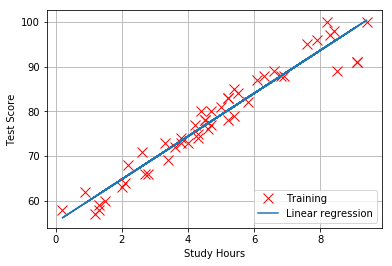

In [62]:
plt.plot(data[:, 0], data[:, 1], "rx", markersize=10, label="Training")
plt.xlabel("Study Hours")
plt.ylabel("Test Score")
plt.plot(data[:, 0], data[:, 0] * w1 + w0, '-', label='Linear regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [63]:
# モデル実行
# 入力
#   w0：w0の重み（更新前）
#   w1：ｗ1の重み（更新前）
#   data：計算するデータ　特徴量[0]：勉強時間　目的変数、正解値[1]：点数
#   alpha：学習率
#   iterations：バッチ数
# リターン値
#   w0_out：w0の重み（更新後）
#   w1_out：ｗ1の重み（更新後）
def run2(data, int_w0, int_w1, alpha, iterations):
    w0 = int_w0
    w1 = int_w1
    for i in range(iterations):
        w0, w1 = gradentDecent2(w0, w1, np.array(data), alpha)
    return w0, w1

In [64]:
w2, w3 = run2(data, int_w0, int_w1, alpha, iterations)

In [65]:
w2, w3

(55.190731858489606, 4.806721169523359)

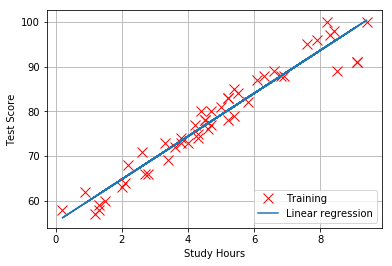

In [67]:
plt.plot(data[:, 0], data[:, 1], "rx", markersize=10, label="Training")
plt.xlabel("Study Hours")
plt.ylabel("Test Score")
plt.plot(data[:, 0], data[:, 0] * w3 + w2, '-', label='Linear regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()